# Market Segmentation with Clustering - Lab

## Introduction

In this lab, we'll use our knowledge of clustering to perform market segmentation on a real-world dataset!

## Objectives

You will be able to:

* Identify and explain what Market Segmentation is, and how clustering can be used for segmentation
* Use clustering algorithms to create and interpret a market segmentation on real-world data

## Getting Started

In this lab, we're going to work with the [Wholesale Customers Dataset] from the UCI Machine Learning Datasets Respository. This dataset contains data on wholesale purchasing information from real businesses. These businesses range from small cafes and hotels to grocery stores and other retailers. 

Here's the data dictionary for this dataset:

|      Column      |                                               Description                                              |
|:----------------:|:------------------------------------------------------------------------------------------------------:|
|       FRESH      |                    Annual spending on fresh products, such as fruits and vegetables                    |
|       MILK       |                               Annual spending on milk and dairy products                               |
|      GROCERY     |                                   Annual spending on grocery products                                  |
|      FROZEN      |                                   Annual spending on frozen products                                   |
| DETERGENTS_PAPER |                  Annual spending on detergents, cleaning supplies, and paper products                  |
|   DELICATESSEN   |                           Annual spending on meats and delicatessen products                           |
|      CHANNEL     | Type of customer.  1=Hotel/Restaurant/Cafe, 2=Retailer. (This is what we'll use clustering to predict) |
|      REGION      |            Region of Portugal that the customer is located in. (This column will be dropped)           |



One benefit of working with this dataset for practice with segmentation is that we actually have the ground-truth labels of what market segment each customer actually belongs to. For this reason, we'll borrow some methodology from Supervised Learning and store these labels separately, so that we can use them afterwards to check how well our clustering segmentation actually performed. 

Let's get started by importing everything we'll need.

In the cell below:

* Import pandas, numpy, and matplotlib.pyplot, and set the standard alias for each. 
* Use numpy to set a random seed of `0`.
* Set all matplotlib visualizations to appear inline.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline

Now, let's load our data and inspect it. You'll find the data stored in `wholesale_customers_data.csv`. 

In the cell below, load the data into a DataFrame and then display the head to ensure everything loaded correctly.

In [3]:
raw_df = pd.read_csv("wholesale_customers_data.csv")

Now, let's go ahead and store the `'Channel'` column in a separate variable, and then drop both the `'Channel'` and `'Region'` columnns. Then, display the head of the new DataFrame to ensure everything worked correctly. 

In [4]:
channels = raw_df['Channel'].values
df = raw_df.drop(columns = ['Channel','Region'])
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


Now, let's get right down to it and begin our clustering analysis. 

In the cell below:

* Import `KMeans` from `sklearn.cluster`, and then create an instance of it. Set the number of clusters to `2`
* Fit the cluster object.
* Get the predictions from the clustering algorithm and store them in `cluster_preds`

In [5]:
from sklearn.cluster import KMeans

In [6]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df)
cluster_preds = k_means.predict(df)

Now, let's use some of the metrics we've learned about to check the performance of our segmentation. We'll use `calinski_harabaz_score` and `adjusted_rand_score`, which can both be found inside `sklearn.metrics.cluster`. 

In the cell below, import these scoring functions. 

In [7]:
from sklearn.metrics.cluster import calinski_harabaz_score,adjusted_rand_score

Now, let's start with CH Score, to get the variance ratio. 

In [1]:
calinski_harabaz_score(df,cluster_preds)

NameError: name 'calinski_harabaz_score' is not defined

Although we don't have any other numbers to compare this to, this is a pretty low score, suggesting that our clusters aren't great. 

Since we actually have ground-truth labels in this case, we can actually use the `adjusted_rand_score` to tell us how well the clustering performed. Adjust Rand Score is meant to compare two clusterings, which the score can interpret our labels as. This will tell us how similar our predicted clusters are to the actual channels. 

Adjusted Rand Score is bounded between -1 and 1. A score close to 1 shows that the clusters are almost identical. A score close to 0 means that predictions are essentially random, while a score close to -1 means that the predictions are pathologically bad, since they are worse than random chance. 

In the cell below, call `adjusted_rand_score` and pass in our `channels` and `cluster_preds` to see how well our first iteration of clustering did. 

In [24]:
adjusted_rand_score(channels,cluster_preds)

0.212843835451224

According to these results, our clusterings were essentially no better than random chance. Let's see if we can improve this. 

### Scaling Our Dataset

Recall that the results of K-Means Clustering is heavily affected by scaling. Since the clustering algorithm is distance-based, this makes sense. Let's use a `StandardScaler` object to scale our dataset and then try our clustering again and see if the results are different. 

In the cells below:

* Import a [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) object and use it to transform our dataset. 
* Create another K-Means object, fit it to our scaled data, and then use it to predict clusters.
* Calculate the Adjusted Rand Score of our new predictions and our labels. 

In [16]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler().fit_transform(df)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaler)
cluster_preds = k_means.predict(scaler)

In [23]:
calinski_harabaz_score(df,cluster_preds)

136.07642353271416

That's a big improvement! Although it's not perfect, we can see that scaling our data had a significant effect on the quality of our clusters. 

## Incorporating PCA

Since clustering algorithms are distance-based, this means that dimensionality has a definite effect on their performance. The greater the dimensionality of the dataset, the the greater the total area that we have to worry about our clusters existing in. Let's try using some Principal Component Analysis to transform our data and see if this affects the performance of our clustering algorithm. 

Since you've aready seen PCA in a previous section, we won't hold your hand through section too much. 

In the cells below:

* Import [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from the appropriate module in sklearn
* Create a `PCA` instance and use it to tranform our scaled data. 
* Investigate the explained variance ratio for each Principal Component. Consider dropping certain components to reduce dimensionality if you feel it is worth the loss of information.
* Create a new `KMeans` object, fit it to our pca-transformed data, and check the Adjusted Rand Score of the predictions it makes. 

**_NOTE:_** Your overall goal here is to get the highest possible Adjusted Rand Score. Don't be afraid to change parameters and rerun things to see how it changes. 

In [25]:
from sklearn.decomposition import PCA

In [77]:
pca_data = PCA(n_components=2).fit_transform(scaler)

In [102]:
k_means = KMeans(n_clusters = 4)
k_means.fit(pca_data)
cluster_preds = k_means.predict(pca_data)

In [103]:
adjusted_rand_score(channels,cluster_preds)

0.5378905263625475

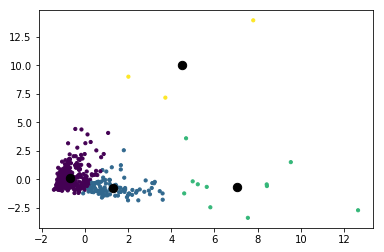

In [105]:
centers = k_means.cluster_centers_
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_preds, s=10)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70)

**_Question_**:  What was the Highest Adjusted Rand Score you achieved? Interpret this score, and determine the overall quality of the clustering. Did PCA affect the performance overall?  How many Principal Components resulted in the best overall clustering performance? Why do you think this is?

Write your answer below this line:
_______________________________________________________________________________________________________________________________

The highest ARS should be ~0.23, which suggests that the clusters are better than random chance, but far from perfect.  Overall, the quality of the clustering algorithm did alot better than the first algorithm we ran on unscaled data. The best performance was achieved when reducing the number of Principal Components down to 4. The increase in model performance is likely due to the reduction in dimensionality. Although dropping the last 2 PCs means that we lose about 6% of our explained variance, this proved to be a net-positive tradeoff for the reduction in dimensionality it provided. 

## Optional Step: Hierarchical Agglomerative Clustering

Now that we've tried doing market segmentation with K-Means Clustering, let's end this lab by trying with HAC!

In the cells below, use [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to make cluster predictions on the datasets we've created, and see how HAC's performance compares to K-Mean's performance. 

**_NOTE_**: Don't just try HAC on the PCA-transformed dataset--also compare algorithm performance on the scaled and unscaled datasets, as well!

## Summary

In this lab, we used our knowledge of clustering to perform a market segmentation on a real-world dataset. We started with a cluster analysis with poor performance, and then implemented some changes to iteratively improve the performance of the clustering analysis!